In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

### Functions

In [2]:
# Function for Daily plots
def plot_over_day(df, column_name, title):
    """
    Plot the specified column over different days of the week.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        title (str): The title for the plot.

    Returns:
        None
    """
    # Group data by 'Day' and calculate the sum of the specified column
    df_day = df.groupby('Day')[column_name].sum()

    # Define the desired order of days starting from Monday
    desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Reorder the index of df_day based on the desired order
    df_day = df_day.reindex(desired_order)

    # Create the plot
    plt.figure(figsize=(15, 10))
    df_day.plot(kind='line', marker='o')  # Add marker for data points
    plt.xlabel('Days')
    plt.ylabel(f'Mean {column_name}')
    plt.title(title)

    # Set the X-axis ticks to show days of the week in the desired order
    plt.xticks(range(len(desired_order)), desired_order)

    plt.grid(True)
    plt.show()
    
def plot_over_day_across_year(df, column_name, title):
    """
    Plot the specified column over different days of the week for each year in one graph.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        title (str): The title for the plot.

    Returns:
        None
    """
    # Group data by 'Year' and 'Day' and calculate the mean of the specified column
    grouped = df.groupby(['Year', 'Day'])[column_name].mean().reset_index()

    # Pivot the DataFrame
    pivot_df = grouped.pivot(index='Day', columns='Year', values=column_name)

    # Define the desired order of days starting from Monday
    desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Reorder the index of pivot_df based on the desired order
    pivot_df = pivot_df.reindex(desired_order)

    # Create the plot
    plt.figure(figsize=(15, 10))
    for year in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[year], marker='o', label=f'Year {year}')

    plt.xlabel('Days')
    plt.ylabel(f'Mean {column_name}')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
    
#Function for Monthly Plots
def plot_over_month(df, column_name, title):
    """
    Plot the specified column over different months.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        title (str): The title for the plot.

    Returns:
        None
    """
    # Group data by 'Month' and calculate the sum of the specified column
    df_month = df.groupby('Month')[column_name].sum()

    # Create the plot
    plt.figure(figsize=(15, 10))
    df_month.plot(kind='line', marker='o')  # Add marker for data points
    plt.xlabel('Months')
    plt.ylabel(f'Mean {column_name}')
    plt.title(title)

    # Set the X-axis ticks to show all months from January to December
    month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                    'August', 'September', 'October', 'November', 'December']
    plt.xticks(range(1, 13), month_labels, rotation=45)
    
    plt.grid(True)
    plt.show()
    
def plot_over_month_across_year(df, column_name, title):
    """
    Plot the specified column over different months for each year in one graph.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        title (str): The title for the plot.

    Returns:
        None
    """
    # Group data by 'Year' and 'Month' and calculate the mean of the specified column
    grouped = df.groupby(['Year', 'Month'])[column_name].sum().reset_index()

    # Pivot the DataFrame
    pivot_df = grouped.pivot(index='Month', columns='Year', values=column_name)
    
    # Create a figure and set the figsize
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the data
    pivot_df.plot(kind='line', marker='o', ax=ax)

    # Set the X-axis ticks to show all months in the correct order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                   'August', 'September', 'October', 'November', 'December']
    plt.xticks(range(1,13), month_order, rotation=45)  # Adjust the rotation as needed

    plt.xlabel('Months')
    plt.ylabel(f'Mean {column_name}')
    plt.title(title)
    plt.legend(title='Years')
    plt.grid(True)
    plt.show()
    
    
#Plot for year    
def plot_over_year(df, column_name, title):
    """
    Plot the specified column over different years.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        title (str): The title for the plot.

    Returns:
        None
    """
    # Group data by 'Year' and calculate the mean of the specified column
    df_yearly = df.groupby('Year')[column_name].mean()

    # Create the plot
    plt.figure(figsize=(15, 10))
    df_yearly.plot(kind='line', marker='o')  # Add marker for data points
    plt.xlabel('Years')
    plt.ylabel(f'Mean {column_name}')
    plt.title(title)

    # Set the X-axis ticks to show years
    plt.xticks(list(df['Year'].unique()), rotation=75)
    
    plt.grid(True)
    plt.show()
    
#Function for comparism    
def plot_comparison_by_category(df, category_column, column1, column2=None, title=None, plot_kind='bar', 
                                x_label=None, y_label=None):
    """
    Plot a chart comparing two numerical columns by a categorical column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        category_column (str): The name of the categorical column (e.g., 'Machine').
        column1 (str): The name of the first numerical column.
        column2 (str, optional): The name of the second numerical column. Defaults to None.
        title (str, optional): The title for the plot. Defaults to None.
        plot_kind (str, optional): The type of plot (e.g., 'bar', 'barh', 'line', 'scatter'). Defaults to 'bar'.
        x_label (str, optional): Custom x-label. Defaults to None (auto-generated based on column names).
        y_label (str, optional): Custom y-label. Defaults to None (auto-generated based on column names).

    Returns:
        None
    """
    if plot_kind not in ('bar', 'barh', 'line', 'scatter'):
        raise ValueError("Invalid plot kind. Supported values are 'bar', 'barh', 'line', or 'scatter'.")

    # Group data by the categorical column and calculate the sum of the numerical columns
    if column2:
        category_groups = df.groupby(category_column)[[column1, column2]].mean()
    else:
        category_groups = df.groupby(category_column)[[column1]].mean()

    # Create the specified plot
    if plot_kind == 'bar':
        category_groups.plot(kind='bar', figsize=(10, 6))
    elif plot_kind == 'barh':
        category_groups.plot(kind='barh', figsize=(10, 6))
    elif plot_kind == 'line':
        category_groups.plot(kind='line', marker='o', figsize=(10, 6))
    elif plot_kind == 'scatter':
        category_groups.plot(kind='scatter', x=column1, y=column2, figsize=(10, 6))

    if x_label:
        plt.xlabel(x_label)
    else:
        plt.xlabel(category_column)

    if y_label:
        plt.ylabel(y_label)
    else:
        plt.ylabel('Quantity')

    if title:
        plt.title(title)

    plt.grid(True)
    plt.show()

def create_plot(data, x, y, hue=None, title=None, xlabel=None, ylabel=None, rotation=90):
    """
    Create a bar plot showing total number of accidents per month.

    data: DataFrame
        The data containing the necessary columns.
    x: str
        The column name for the x-axis.
    y: str
        The column name for the y-axis.
    hue: str, optional
        The column name for the hue parameter.
    title: str, optional
        The title of the plot.
    xlabel: str, optional
        The label for the x-axis.
    ylabel: str, optional
        The label for the y-axis.
    rotation: int, optional
        The rotation angle of x-axis labels.
    """
    plt.figure(figsize=(10, 6))
    sb.barplot(x=x, y=y, hue=hue, data=data, ci=None)
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.tight_layout()
    plt.show()

In [3]:
reaction = pd.read_csv('Reactions.csv')
content= pd.read_csv('Content.csv')
reaction_type= pd.read_csv('ReactionTypes.csv')

In [4]:
reaction.shape

(24573, 4)

In [5]:
reaction.drop(columns='Unnamed: 0', inplace=True)

In [6]:
reaction

,Content ID,Reaction Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12:25
...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,27/06/2020 09:46
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,16/02/2021 17:17
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,12/09/2020 03:54
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,04/11/2020 20:08


In [7]:
content.drop(columns='Unnamed: 0', inplace=True)

In [8]:
content

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [9]:
content['Category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', 'Fitness', 'Veganism', 'Travel', 'Education',
       'Technology', 'Soccer', 'Culture', 'Food', 'Healthy Eating',
       'Science', 'Public Speaking'], dtype=object)

In [10]:
content['Category'].replace({'animals':'Animals', 'healthy eating':'Healthy Eating',
                            'technology':'Technology','education': 'Education', 'studying':'Studying', 
                             'veganism':'Veganism', 'culture':'Culture', 'travel':'Travel', 
                             'soccer':'Soccer', 'food':'Food', 'science':'Science',
                            'public speaking':'Public speaking','Public Speaking':'Public speaking', 'fitness':'Fitness'},inplace=True)

In [11]:
content['Category'].unique()

array(['Studying', 'Healthy Eating', 'Technology', 'Food', 'cooking',
       'dogs', 'Soccer', 'Public speaking', 'Science', 'tennis', 'Travel',
       'Fitness', 'Education', 'Veganism', 'Animals', 'Culture'],
      dtype=object)

In [12]:
reaction_type.drop(columns='Unnamed: 0', inplace=True)

In [13]:
reaction_type.rename(columns={'Type':'Reaction Type'}, inplace=True)

In [14]:
reaction_type

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


In [15]:
content_reaction = reaction.merge(content, on='Content ID')

In [16]:
content_reaction

,Content ID,Reaction Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/06/2021 12:22,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/04/2021 05:13,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/08/2020 12:25,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,27/06/2020 09:46,audio,Technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,16/02/2021 17:17,audio,Technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,12/09/2020 03:54,audio,Technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,04/11/2020 20:08,audio,Technology


In [17]:
df=content_reaction.merge(reaction_type, on='Reaction Type')

In [18]:
df

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,07/11/2020 09:43,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,06/01/2021 19:13,photo,Studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,09/04/2021 02:46,photo,Studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,28/03/2021 21:15,photo,Healthy Eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,04/08/2020 05:40,photo,Healthy Eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,04/10/2020 22:26,audio,Veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,18/09/2020 10:50,audio,Veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,31/10/2020 03:58,GIF,Culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,25/06/2020 15:12,GIF,Culture,positive,72


In [19]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d/%m/%Y %H:%M')

In [21]:
df['Day']= pd.to_datetime(df['Datetime']).dt.day_name()
df['Month'] =pd.to_datetime(df['Datetime']).dt.month
df['Year'] =pd.to_datetime(df['Datetime']).dt.year

In [22]:
df

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Day,Month,Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:00,photo,Studying,negative,0,Saturday,11,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:00,photo,Studying,negative,0,Wednesday,1,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:00,photo,Studying,negative,0,Friday,4,2021
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:00,photo,Healthy Eating,negative,0,Sunday,3,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:00,photo,Healthy Eating,negative,0,Tuesday,8,2020
...,...,...,...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:00,audio,Veganism,positive,72,Sunday,10,2020
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:00,audio,Veganism,positive,72,Friday,9,2020
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:00,GIF,Culture,positive,72,Saturday,10,2020
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:00,GIF,Culture,positive,72,Thursday,6,2020


### Unique Categories

Text(0.5, 1.0, 'Unique Categories')

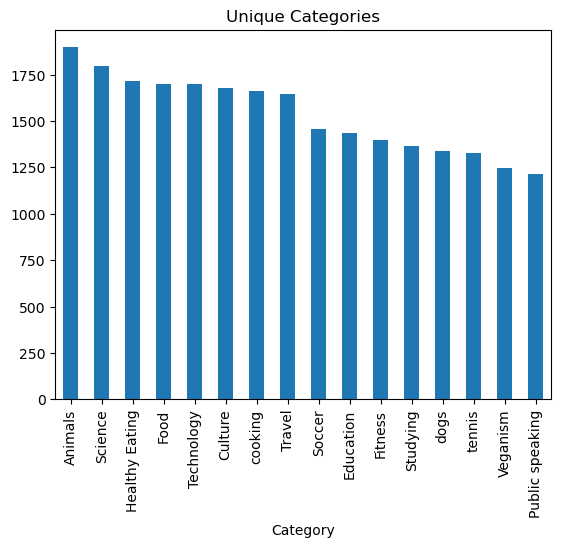

In [30]:
df['Category'].value_counts().plot(kind='bar')
plt.title('Unique Categories')

### Top 5 Categories

In [61]:
top_categories = df.groupby('Category')['Score'].sum().reset_index().sort_values(by='Score', ascending=False).head(5)

In [62]:
top_categories

,Category,Score
0,Animals,74965
7,Science,71168
5,Healthy Eating,69339
10,Technology,68738
4,Food,66676


In [74]:
top_5_categories=df[df['Category'].isin(['Animals','Science', 'Healthy Eating', 'Technology', 'Food'])]

In [75]:
top_5_categories

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Day,Month,Year
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:00,photo,Healthy Eating,negative,0,Sunday,3,2021
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:00,photo,Healthy Eating,negative,0,Tuesday,8,2020
10,5118e9c5-1377-4cc5-a486-65b35b7b7b76,disgust,2020-11-07 08:49:00,GIF,Science,negative,0,Saturday,11,2020
15,81abd65a-3b76-4574-a0a7-db6bf7184ae2,disgust,2020-12-08 13:12:00,video,Food,negative,0,Tuesday,12,2020
16,81abd65a-3b76-4574-a0a7-db6bf7184ae2,disgust,2021-01-05 13:15:00,video,Food,negative,0,Tuesday,1,2021
...,...,...,...,...,...,...,...,...,...,...
24556,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2020-10-03 18:30:00,photo,Animals,positive,72,Saturday,10,2020
24557,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2021-05-08 17:29:00,photo,Animals,positive,72,Saturday,5,2021
24563,c54b49c4-b1f2-4641-8595-1cbd19937845,adore,2021-06-09 10:23:00,photo,Science,positive,72,Wednesday,6,2021
24564,c54b49c4-b1f2-4641-8595-1cbd19937845,adore,2020-07-29 13:54:00,photo,Science,positive,72,Wednesday,7,2020


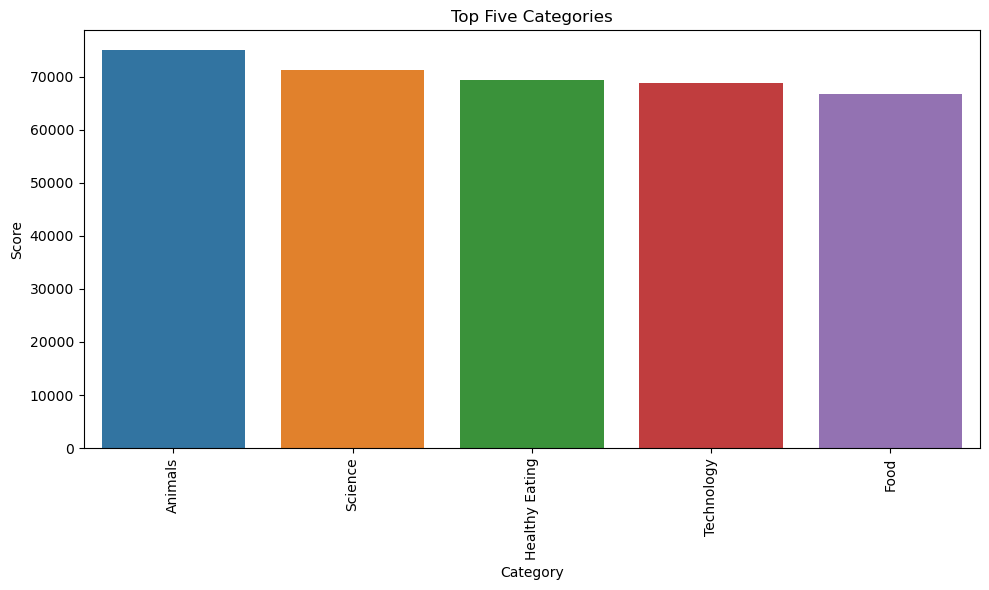

In [63]:
create_plot(top_categories, x='Category', y='Score', title= 'Top Five Categories')

### Reactions of the most popular Category

In [32]:
popular_category = df[df['Category']=='Animals']
popular_category

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Day,Month,Year
64,4fa14453-7b29-4302-b51f-9aa23b472c1b,disgust,2020-09-08 15:30:00,audio,Animals,negative,0,Tuesday,9,2020
67,4478d98e-43e8-4dc0-884d-c1115aa8b970,disgust,2020-07-05 20:02:00,audio,Animals,negative,0,Sunday,7,2020
198,f01ec49c-3179-43bb-b127-2b1a73f34b06,disgust,2021-01-21 16:00:00,photo,Animals,negative,0,Thursday,1,2021
199,f01ec49c-3179-43bb-b127-2b1a73f34b06,disgust,2021-02-25 22:40:00,photo,Animals,negative,0,Thursday,2,2021
224,2cbbdbf6-b34e-4fbb-bdc6-904e61f91ce7,disgust,2020-12-26 08:14:00,photo,Animals,negative,0,Saturday,12,2020
...,...,...,...,...,...,...,...,...,...,...
24550,cab37e79-0e76-4bd2-b6bd-2fc8bf66ca99,adore,2020-11-26 06:17:00,photo,Animals,positive,72,Thursday,11,2020
24551,cab37e79-0e76-4bd2-b6bd-2fc8bf66ca99,adore,2020-10-16 06:13:00,photo,Animals,positive,72,Friday,10,2020
24555,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2020-11-18 17:02:00,photo,Animals,positive,72,Wednesday,11,2020
24556,89cb4504-fccd-40f4-945e-410f74ee4735,adore,2020-10-03 18:30:00,photo,Animals,positive,72,Saturday,10,2020


Text(0.5, 1.0, 'Reactions of the most popular category (Animal)')

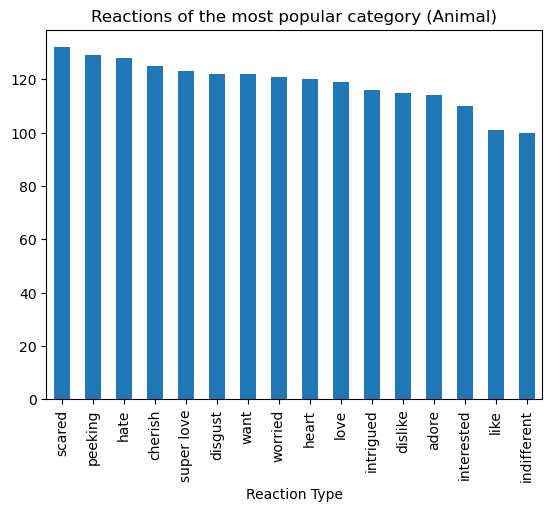

In [43]:
popular_category['Reaction Type'].value_counts().plot(kind='bar')
plt.title('Reactions of the most popular category (Animal)')

### Popular Content Types

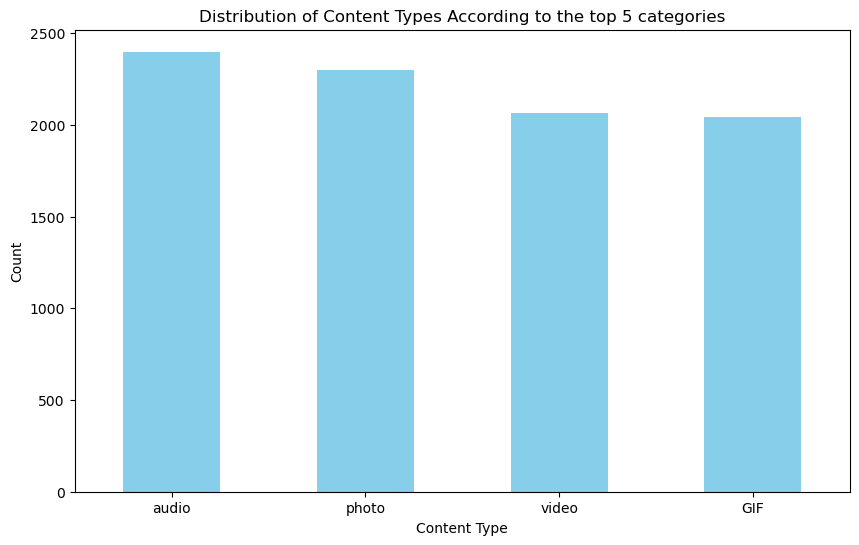

In [77]:
content_type_counts = top_5_categories['Content Type'].value_counts()
plt.figure(figsize=(10, 6))
content_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Distribution of Content Types According to the top 5 categories')
plt.xticks(rotation=0)
plt.show()

In [78]:
content_type_counts

Content Type
audio    2399
photo    2300
video    2063
GIF      2045
Name: count, dtype: int64

### Distribution of Sentiment

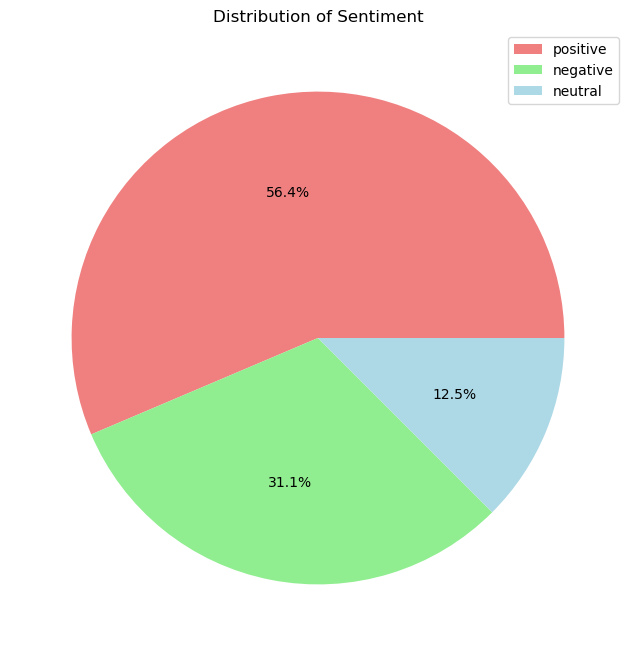

In [79]:
sentiment_counts = top_5_categories['Sentiment'].value_counts()
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightblue'], labels=None)
plt.title('Distribution of Sentiment')
plt.ylabel('')
plt.legend(labels=sentiment_counts.index, loc='upper right')
plt.show()

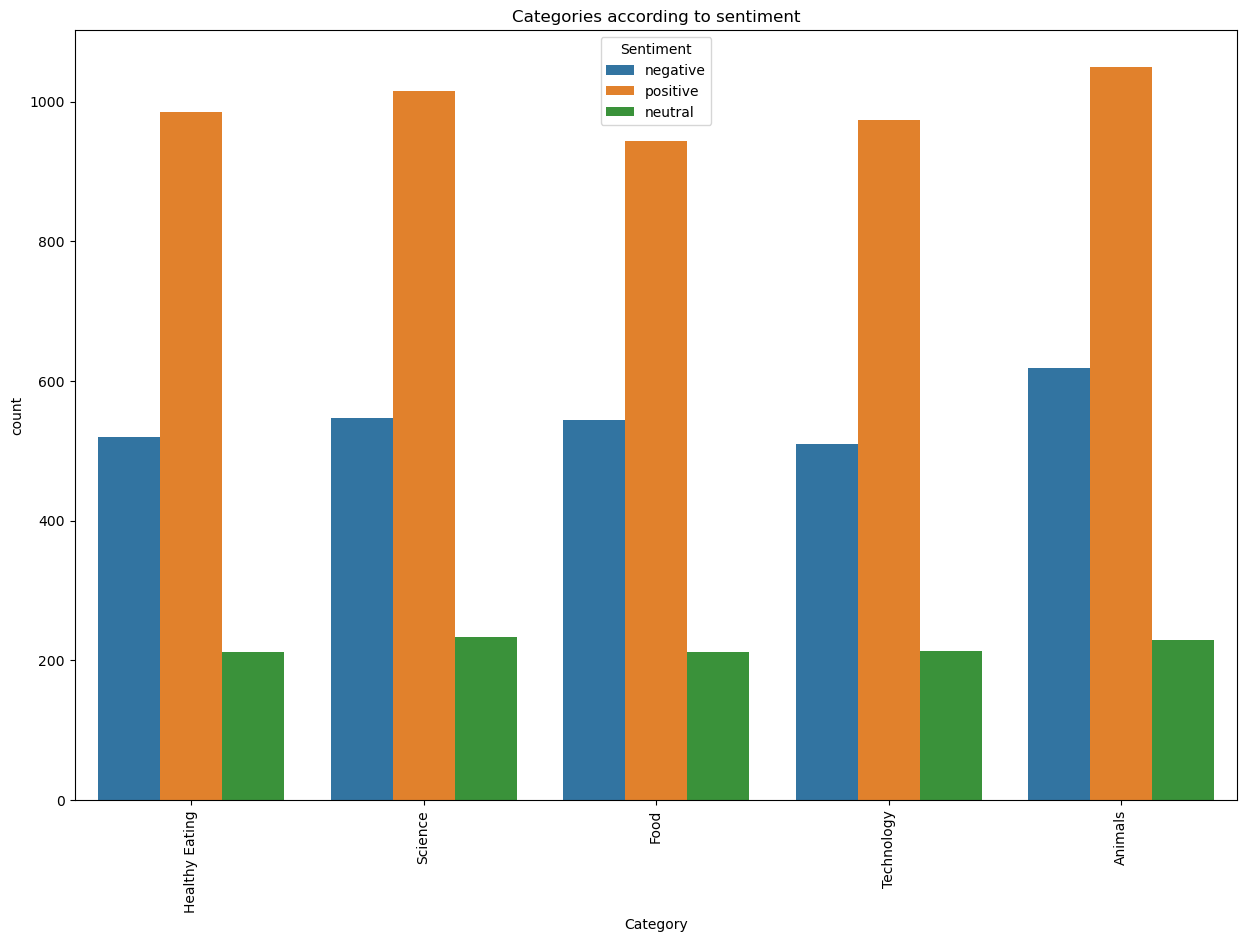

In [80]:
plt.figure(figsize=(15,10))
sb.countplot(data=top_5_categories, x='Category', hue='Sentiment')
plt.title('Categories according to sentiment')
plt.xticks(rotation=90);

### Reaction Type Distribution

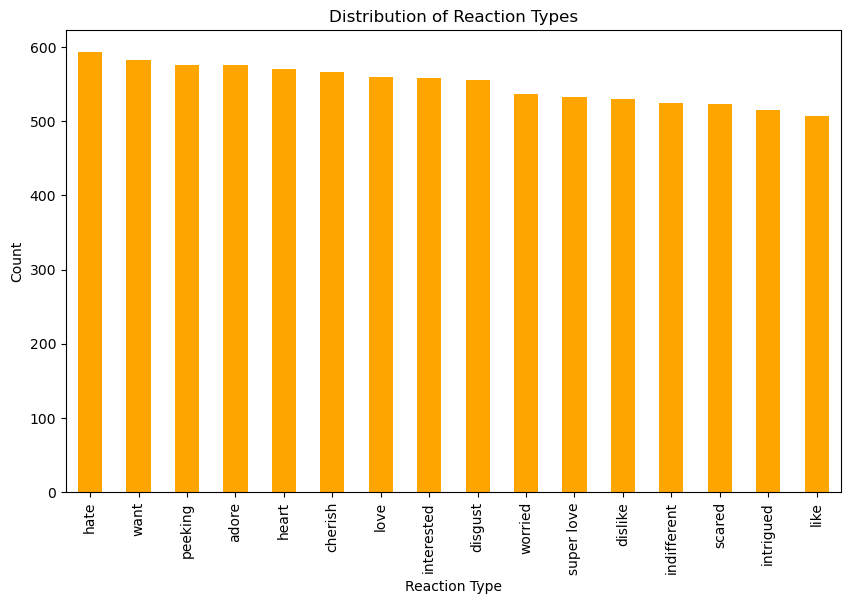

In [81]:
reaction_type_counts = top_5_categories['Reaction Type'].value_counts()

plt.figure(figsize=(10, 6))
reaction_type_counts.plot(kind='bar', color='orange')
plt.xlabel('Reaction Type')
plt.ylabel('Count')
plt.title('Distribution of Reaction Types')
plt.xticks(rotation=90)
plt.show()

In [82]:
reaction_type_counts

Reaction Type
hate           593
want           582
peeking        576
adore          576
heart          570
cherish        566
love           560
interested     558
disgust        556
worried        537
super love     533
dislike        530
indifferent    525
scared         523
intrigued      515
like           507
Name: count, dtype: int64

### Reaction Type and Score

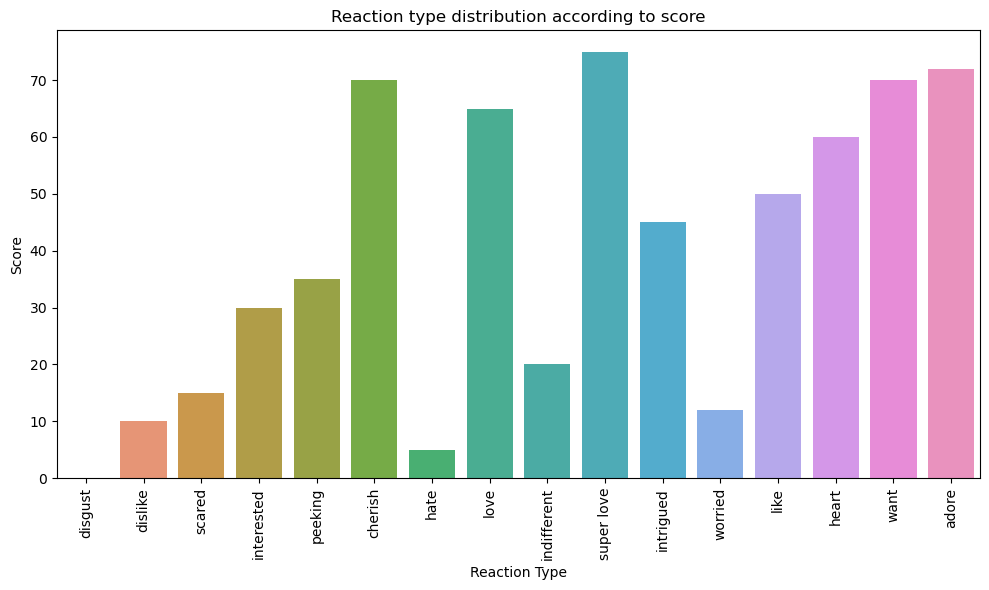

In [83]:
create_plot(top_5_categories, x='Reaction Type', y='Score', title='Reaction type distribution according to score')

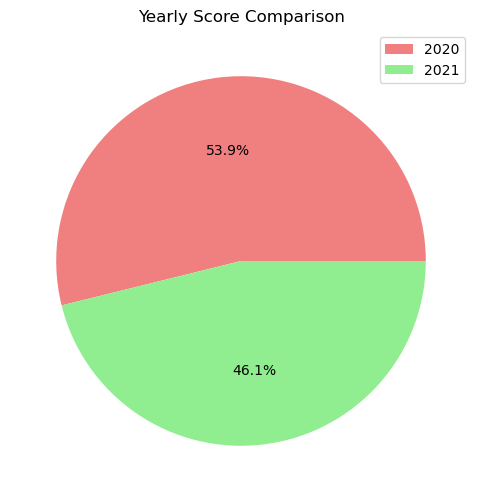

In [84]:
# Group by 'Year' and calculate the total 'Score' for each year
yearly_score_sum = top_5_categories.groupby('Year')['Score'].sum()

# Plot the yearly score comparison
plt.figure(figsize=(10, 6))
yearly_score_sum.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], labels=None)
plt.ylabel('')
plt.title('Yearly Score Comparison')
plt.legend(labels=yearly_score_sum.index, loc='upper right')
plt.show()

### Sentiment Distribution by Year

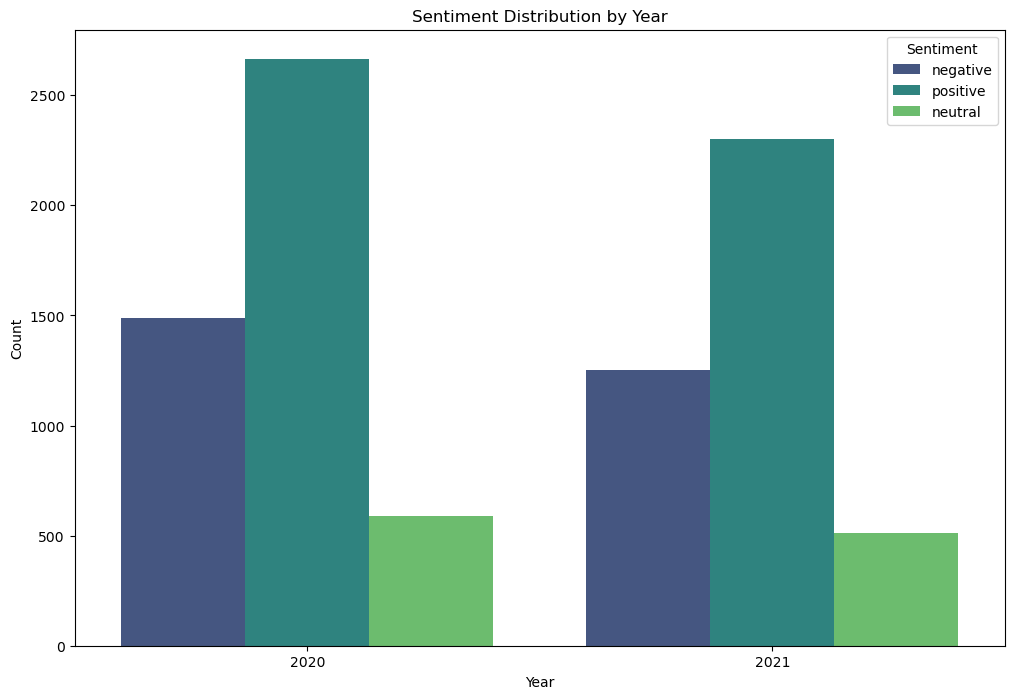

In [85]:
plt.figure(figsize=(12, 8))
sb.countplot(x='Year', hue='Sentiment', data=top_5_categories, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Year')
plt.legend(title='Sentiment')
plt.show()

### Content Type and Sentiment

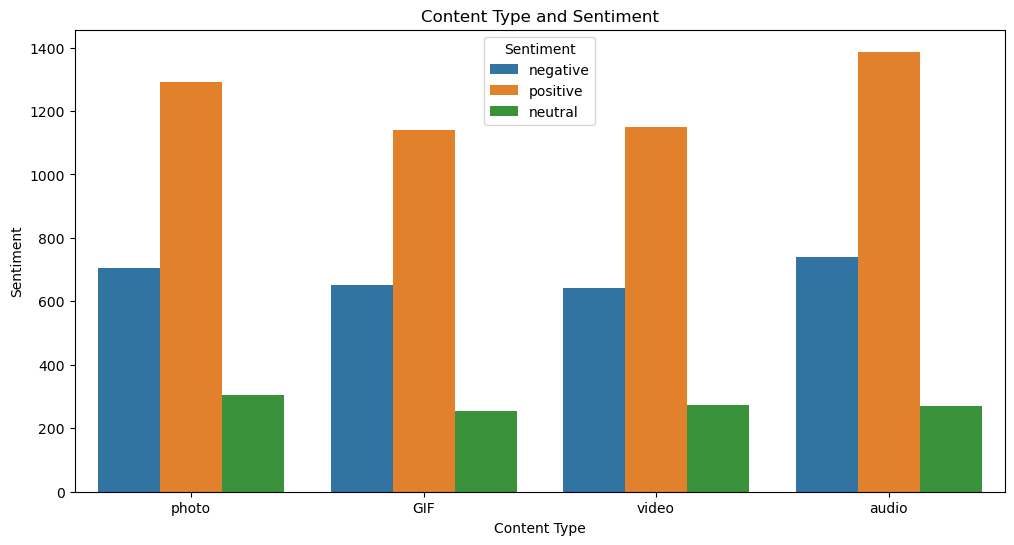

In [86]:
plt.figure(figsize=(12, 6))
sb.countplot(x='Content Type', hue='Sentiment', data=top_5_categories)
plt.xlabel('Content Type')
plt.ylabel('Sentiment')
plt.title('Content Type and Sentiment')
plt.show()

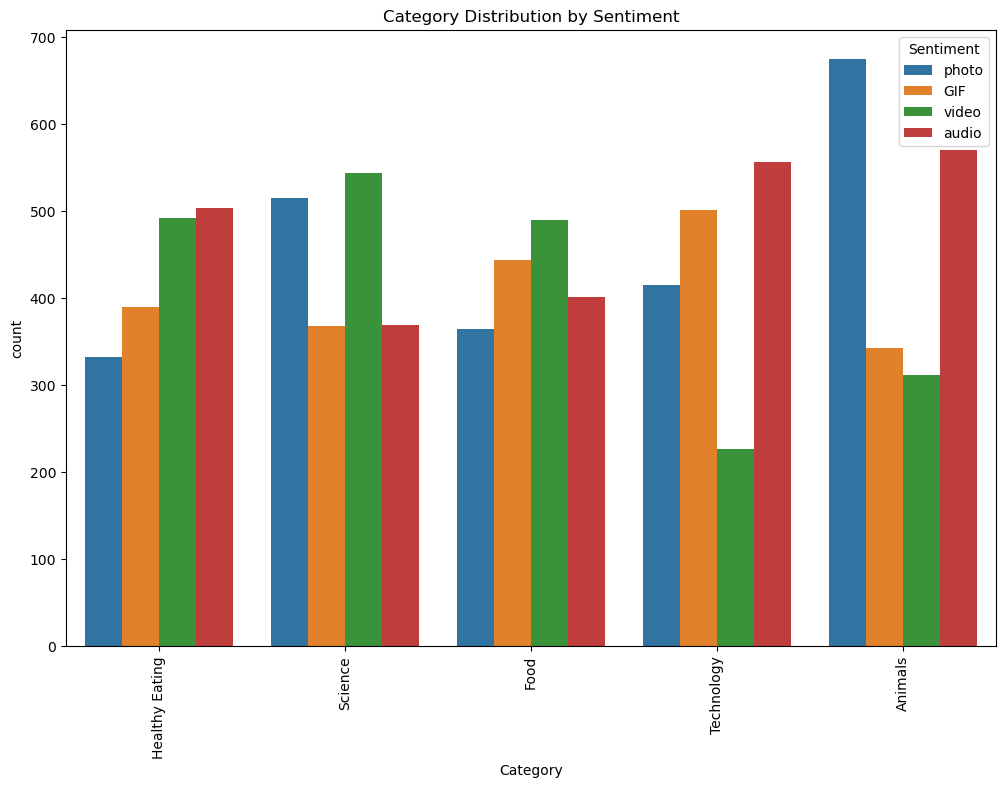

In [102]:
plt.figure(figsize=(12, 8))
sb.countplot(x='Category', hue='Content Type', data=top_5_categories)
plt.title('Category Distribution by Sentiment')
plt.legend(title='Sentiment')
plt.xticks(rotation=90)
plt.show()

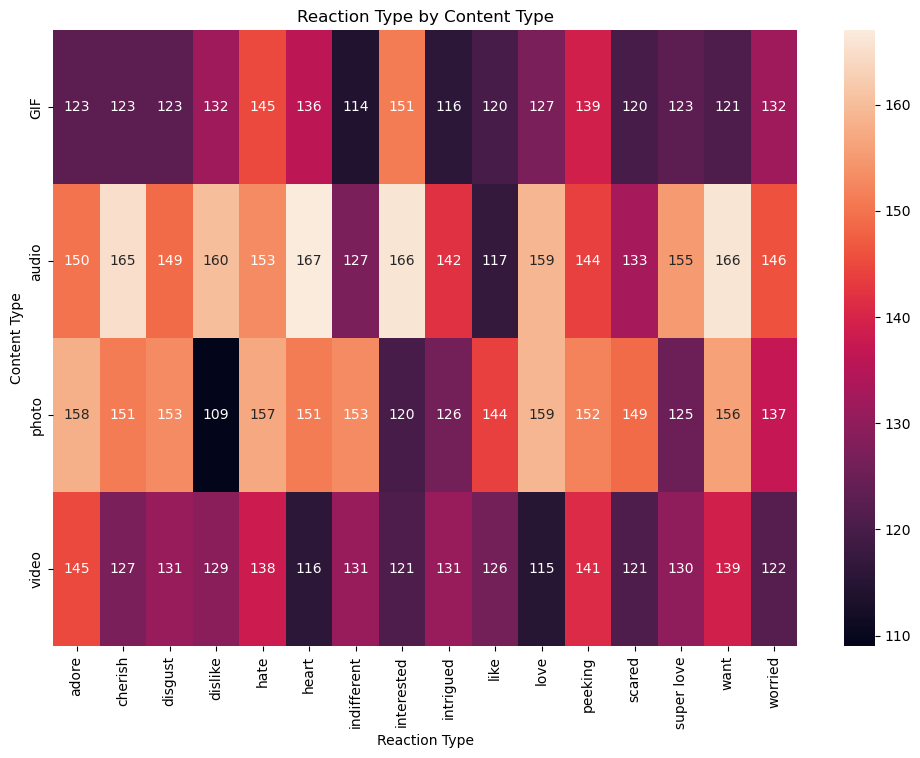

In [88]:
reaction_type_by_content_type = top_5_categories.pivot_table(index='Content Type', columns='Reaction Type', aggfunc='size', fill_value=0)

# Plot the heatmap for reaction type by content type
plt.figure(figsize=(12, 8))
sb.heatmap(reaction_type_by_content_type, annot=True, fmt='d')
plt.xlabel('Reaction Type')
plt.ylabel('Content Type')
plt.title('Reaction Type by Content Type')
plt.show()

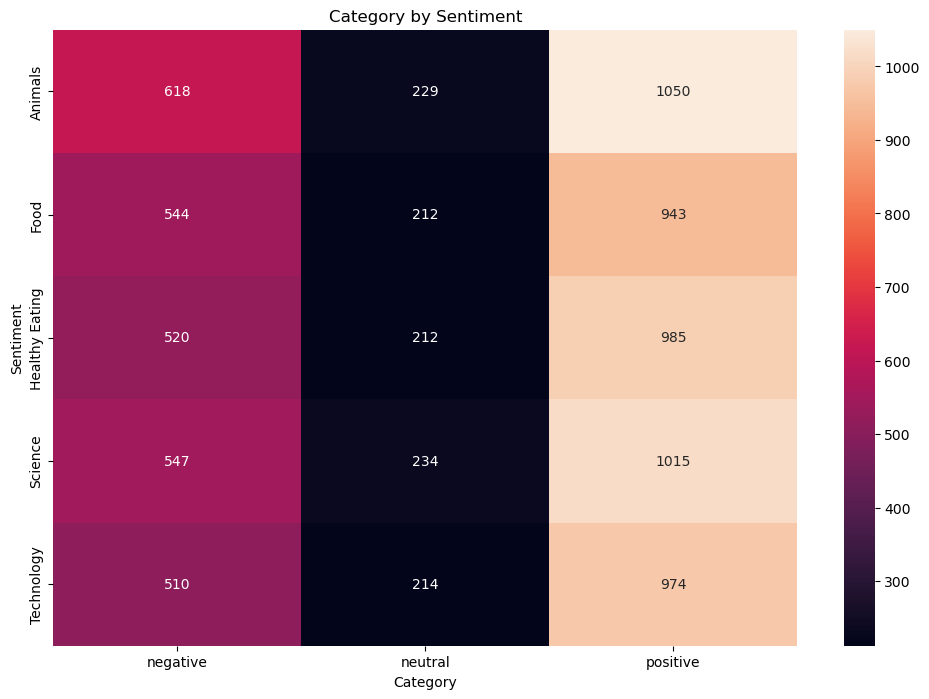

In [89]:
reaction_type_by_content_type = top_5_categories.pivot_table(index='Category', columns='Sentiment', aggfunc='size', fill_value=0)

# Plot the heatmap for reaction type by content type
plt.figure(figsize=(12, 8))
sb.heatmap(reaction_type_by_content_type, annot=True, fmt='d')
plt.xlabel('Category')
plt.ylabel('Sentiment')
plt.title('Category by Sentiment')
plt.show()

In [90]:
# Count the occurrences of each sentiment category for each month
sentiment_counts = top_5_categories.groupby(['Month', 'Sentiment']).size().reset_index(name='Count')
sentiment_counts

,Month,Sentiment,Count
0,1,negative,237
1,1,neutral,97
2,1,positive,409
3,2,negative,215
4,2,neutral,83
5,2,positive,389
6,3,negative,235
7,3,neutral,76
8,3,positive,390
9,4,negative,216


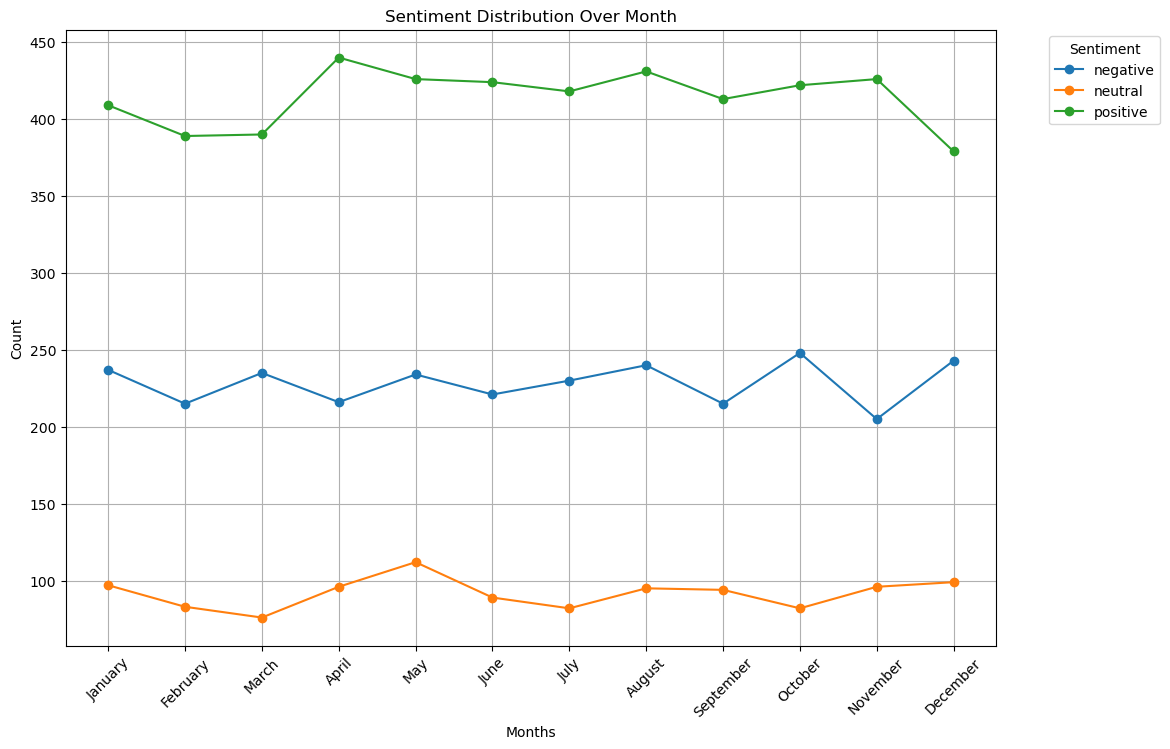

In [91]:
# Pivot the DataFrame
pivot_df = sentiment_counts.pivot(index='Month', columns='Sentiment', values='Count')
    
    # Create a figure and set the figsize
fig, ax = plt.subplots(figsize=(12, 8))

    # Plot the data
pivot_df.plot(kind='line', marker='o', ax=ax)

    # Set the X-axis ticks to show all months in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
plt.xticks(range(1,13), month_order, rotation=45)  # Adjust the rotation as needed

plt.xlabel('Months')
plt.ylabel('Count')
plt.title('Sentiment Distribution Over Month')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

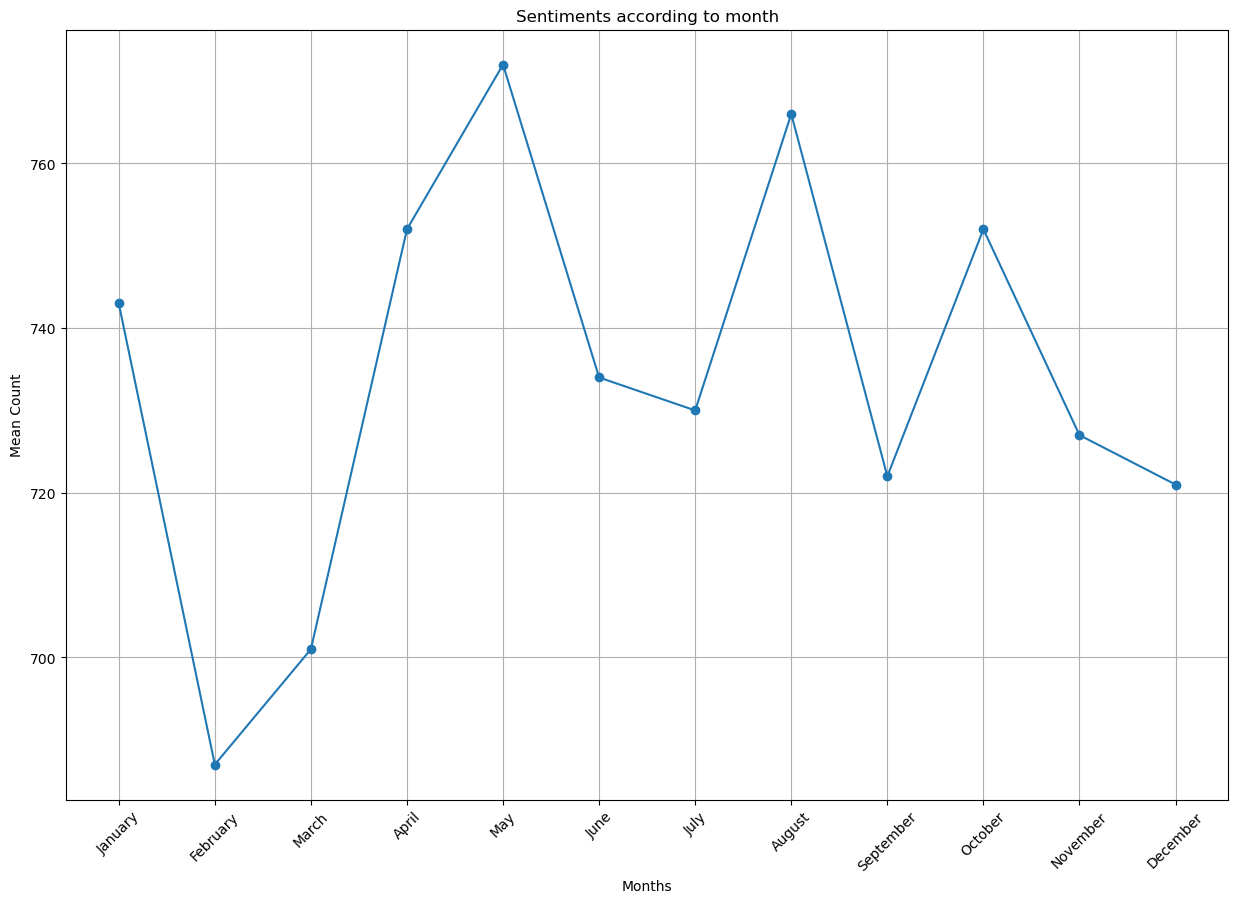

In [101]:
plot_over_month(sentiment_counts, 'Count', 'Sentiments according to month')

In [99]:
# Count the occurrences of each sentiment category for each month
day_sentiment_counts = top_5_categories.groupby(['Day', 'Sentiment']).size().reset_index(name='Count')
day_sentiment_counts

,Day,Sentiment,Count
0,Friday,negative,413
1,Friday,neutral,167
2,Friday,positive,723
3,Monday,negative,399
4,Monday,neutral,172
5,Monday,positive,687
6,Saturday,negative,396
7,Saturday,neutral,164
8,Saturday,positive,659
9,Sunday,negative,381


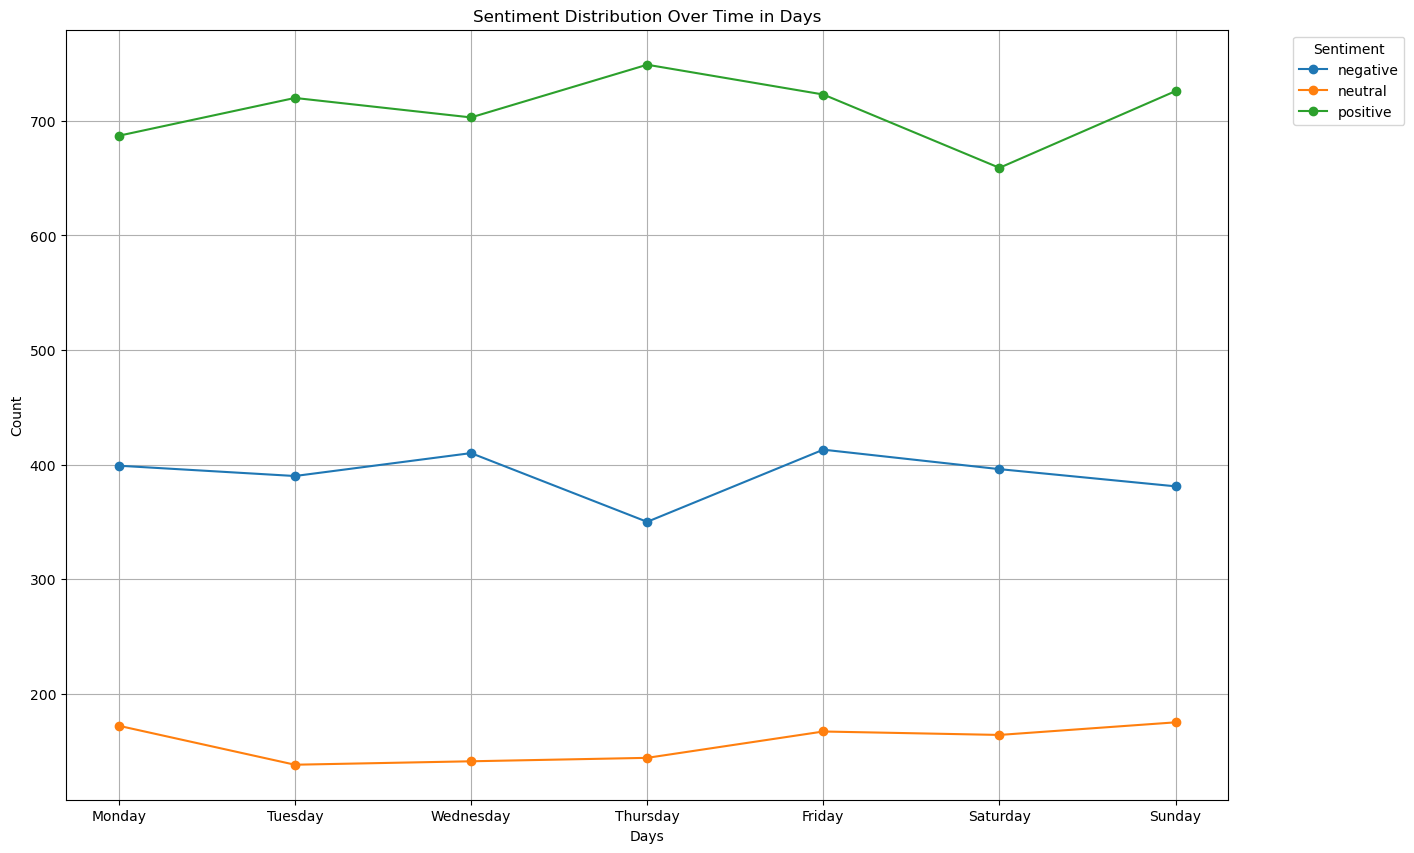

In [100]:
 # Pivot the DataFrame
pivot_df = day_sentiment_counts.pivot(index='Day', columns='Sentiment', values='Count')

# Define the desired order of days starting from Monday
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reorder the index of pivot_df based on the desired order
pivot_df = pivot_df.reindex(desired_order)

# Create the plot
plt.figure(figsize=(15, 10))
for day in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[day], marker='o', label=f'{day}')

plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Sentiment Distribution Over Time in Days')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

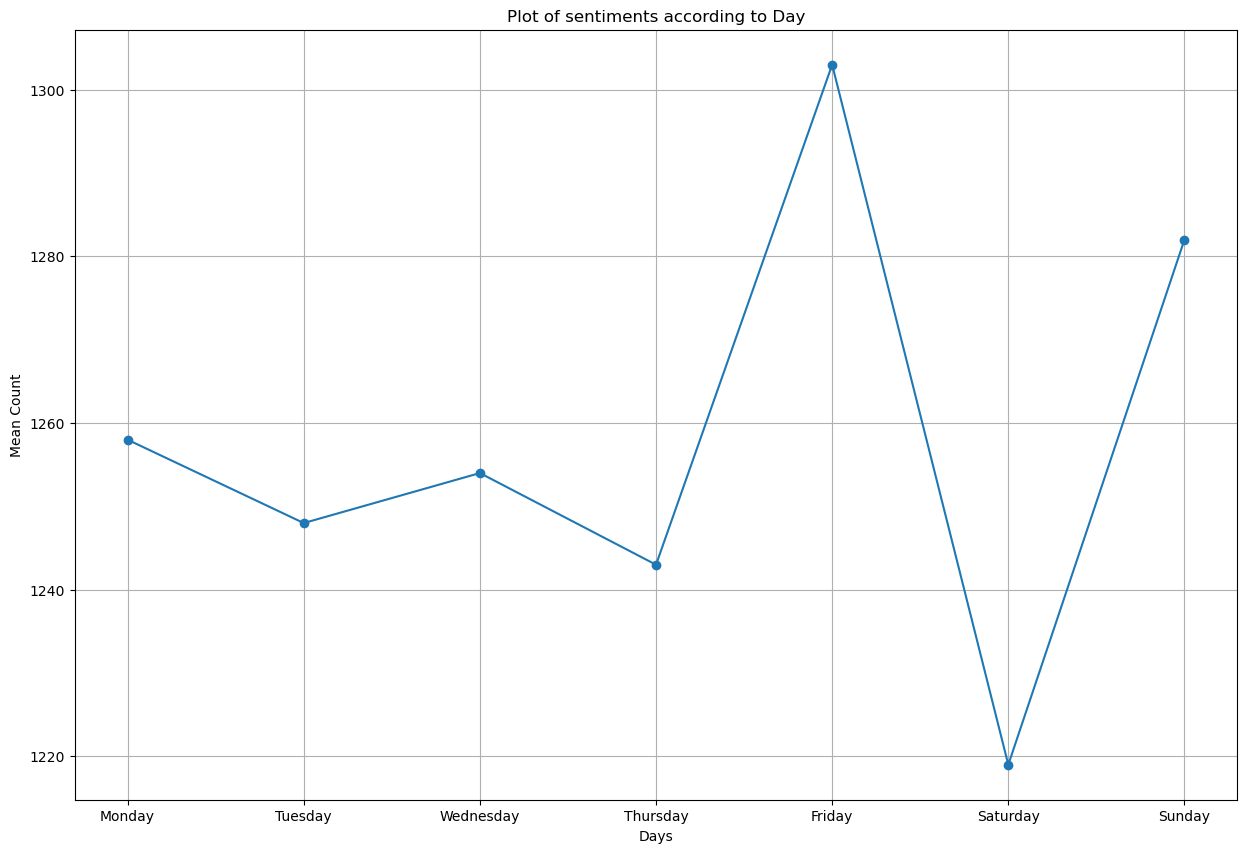

In [98]:
plot_over_day(day_sentiment_counts, 'Count', 'Plot of sentiments according to Day')